<a href="https://colab.research.google.com/github/pherathm/DATA110/blob/main/Week10_HW_Piushani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/Reben80/Data110-22016/refs/heads/main/dataset/Daily_Arrests_20241001%20(1).csv')
df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
0,ENCARNAION HERASME,LUIS,NaN,24,Block Of 6841 TREXLEY,ASHFORK,MD,09/19/2024,VIOLATE PROTECTIVE ORDER
1,DEL CID-PALACIOS,JEFFREY,MITCHELL,34,11700 Block Of Leona St,SILVER SPRING,MD,09/19/2024,INTIMIDATE/INFLU JUROR-FELONY OFF
2,CHAVEZ,SANDRA,NaN,21,0 Block Of Silver Kettle Court,GAITHERSBURG,MD,09/19/2024,ASSAULT-SECOND DEGREE
3,PEREZ GONZALES,JOSE,NaN,37,12900 Block Of TWINBROOK PKWY,ROCKVILLE,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
4,SIMON,DAVID,BRETT,74,12800 Block Of BRUSHWOOD TERR,Potomac,MD,09/19/2024,DRIVING UNINSURED VEHICLE


1. **Filter Theft-Related Offenses**

In [5]:
# Filter rows where 'OFFENSE' contains 'theft' (case-insensitive)
theft_df = df[df['OFFENSE'].str.contains("theft", case=False, na=False)]

theft_df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
3,PEREZ GONZALES,JOSE,NaN,37,12900 Block Of TWINBROOK PKWY,ROCKVILLE,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
13,CLARK,MICHAEL,ALANZOE,40,1300 Block Of new york ave,WASHINGTON,DC,09/20/2024,"THEFT: $100 TO UNDER $1,500"
14,MEJIA POSADA,RENE,ALEXANDER,26,0 Block Of NINA CT,GAITHERSBURG,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
22,ESCOBAR,DEYANIRA,HILARIA,35,400 Block Of COLLEGE PKWY,ROCKVILLE,MD,09/20/2024,"THEFT: $100 TO UNDER $1,500"
30,WEST,MAIA,FRANCESCA,28,9900 Block Of BIG ROCK RD,SILVER SPRING,MD,09/21/2024,"THEFT: $1,500 TO UNDER $25,000"


 2. **Exploratory Data Analysis (EDA)**

Total Number of Theft Incidents



In [7]:
total_theft = len(df)
print(total_theft)

473


Total Number of Theft Incidents= 473

 Range of Ages

In [8]:
age_min = df['AGE'].min()
age_max = df['AGE'].max()
print(f"Age range: {age_min} to {age_max}")

Age range: 16 to 86


3. **Visualizing Theft Offenses by Day of the Week**

<ipython-input-9-a71677aa04a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['ARREST DATE'] = pd.to_datetime(theft_df['ARREST DATE'])
<ipython-input-9-a71677aa04a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['Day_Of_Week'] = theft_df['ARREST DATE'].dt.day_name()


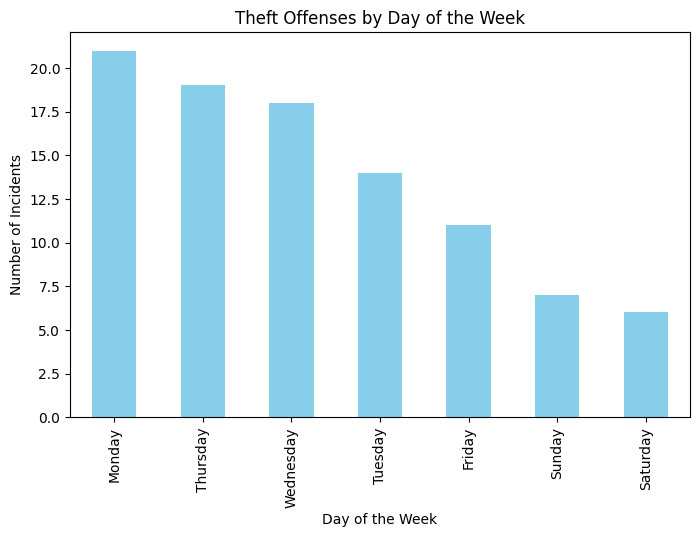

In [9]:
# Convert date column to datetime and extract day of the week
theft_df['ARREST DATE'] = pd.to_datetime(theft_df['ARREST DATE'])
theft_df['Day_Of_Week'] = theft_df['ARREST DATE'].dt.day_name()

# Count offenses by day of the week
theft_by_day = theft_df['Day_Of_Week'].value_counts()

# Plot
theft_by_day.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Theft Offenses by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()



**Task**: Which day of the week has the highest number of theft arrests? What might be the reasons for this trend?

Monday

Reasons:

1. Many thefts, like shoplifting or stealing during busy weekends, might only be reported or handled on Mondays
2. Monday is when financial struggles, like needing money after weekend spending, can lead to thefts.
3. Theft at offices or businesses is often noticed when people return to work on Monday.
4. Police may handle more cases from the weekend on Mondays, increasing arrests that day.


4. **Age Distribution of Theft Offenders**

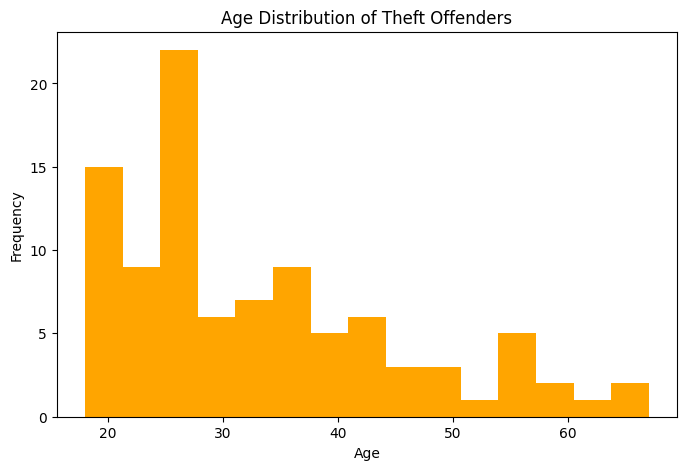

In [10]:
theft_df['AGE'].plot(kind='hist', bins=15, color='orange', figsize=(8, 5))
plt.title('Age Distribution of Theft Offenders')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [11]:
#Identify the most involved age group:
age_mode = theft_df['AGE'].mode()[0]
print(f"The most involved age group: {age_mode}")

The most involved age group: 26


5. **Offense Analysis**

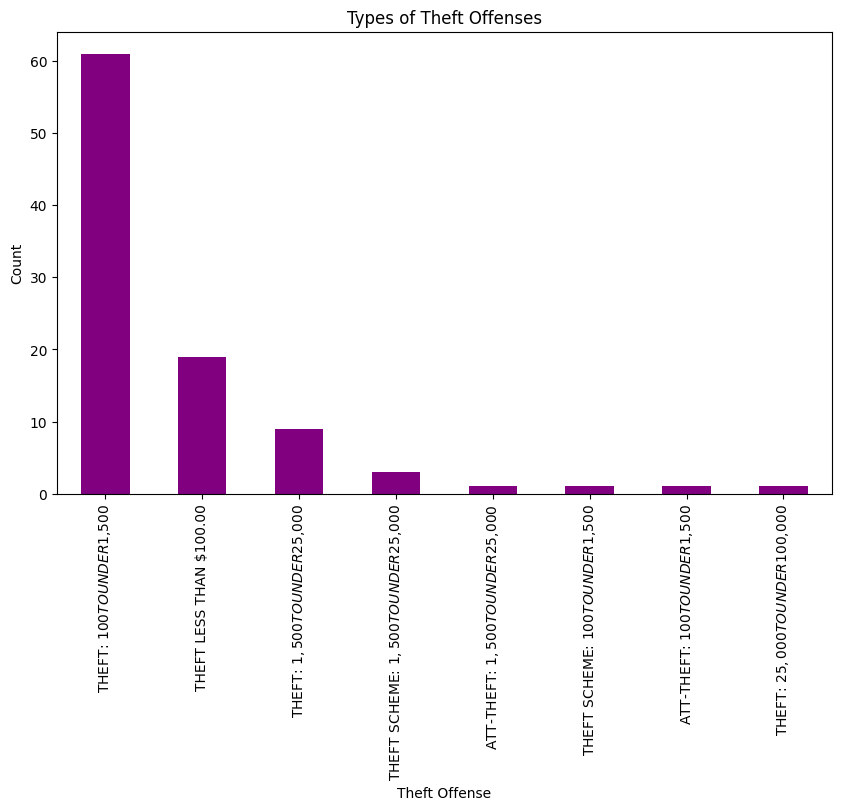

In [12]:
offense_counts = theft_df['OFFENSE'].value_counts()

# Plot
offense_counts.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title('Types of Theft Offenses')
plt.xlabel('Theft Offense')
plt.ylabel('Count')
plt.show()

6. **Additional Visualization**

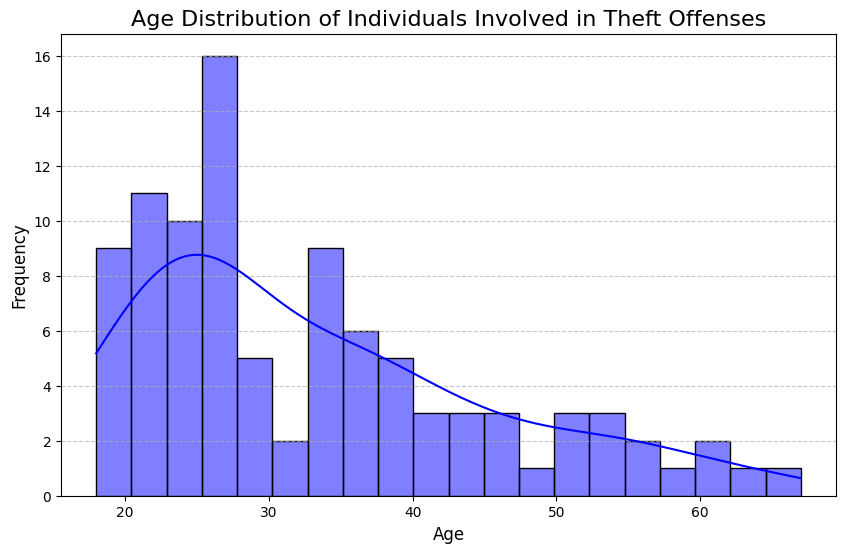

In [14]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(theft_df['AGE'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Age Distribution of Individuals Involved in Theft Offenses', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most of the theft-related offenses are aged around mid-20s.